# Практическая работа №3: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 1384 Тапеха Владимир Алексеевич и Лукин Евгений Юрьевич. Вариант №9.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

#### Дискретный нерекурсивный фильтр

Для входного детерминированного сигнала $x(n)$, дискретный нерекурсивный фильтр является формулой, описывающей последовательность чисел $y_n$ как выходного сигнала. Одной из возможных форм этой формулы может быть представлена как:

$y_n = \sum_{k=0}^{m} c_k x_{n-k}$

Для сглаживания полиномом предполагается, что $y_n = A + Bn + Cn^2 + \dots$ с необходимым количеством членов. Приближение производится в смысле МНК, поэтому:

$
F(A, B) = \sum_{k=-m}^m(s_k - y_k)^2
$

#### Следствие формулы Эйлера:

$e^{ix} + e^{-ix} = 2 \cos(x)$

#### Круговая и циклическая частоты:

$\omega = 2 \pi f$

#### Передаточная функция

Передаточная функция представляет собой поведение системы, описывающее преобразование входного сигнала в выходной. Для нерекурсивного фильтра передаточная функция вычисляется следующим образом:

$H(w) = \frac{y_n}{x_n}$

В случае гармонического дискретного сигнала функция примет вид:

$H(w) = \frac{ \sum_{k=0}^{m} c_k e^{i\omega(n-k)} }{ e^{iwn} } = \sum_{k=0}^{m} c_k e^{-i\omega k}$

#### Формулы Спенсера:

Для 15 точек:

$$y_n = \frac{(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} -6 s_{n+6} - 3s_{n+7})}{320}$$

Для 21 точки:

$$y_n = \frac{ (-1s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + ...)}{350}$$



## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H(f)}$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

Импорт необходмых библиотек.

In [100]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

Функция для расчета формул сглаживания с передаваемым уравнением выходного сигнала и точками

In [101]:
def yn(model, params, points):
  result = []
  for n in points:
    n = n // 2

    symbols_list = []
    for i in range(-n, n+1):
      symbols_list.append(f"s_n{i}")

    s = sp.symbols(' '.join(symbols_list))

    k = np.array([i for i in range(-n, n+1)])
    f = np.sum([(s_k - model.subs(t, num))**2 for num, s_k in zip(k, s)])

    eqs = []
    for p in params:
      eqs.append(sp.diff(f, p))
    solution = sp.solve(eqs, params)

    yn = model.subs(t, 0)
    result.append(yn.subs(solution))

  return result

### Задание 1.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H(f)}$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Попробуем выразить передаточную функцию нерекурсивного фильтра для общего случая в виде формулы - 2m + 1.

Далее, обозначим входной сигнал как $s(t)$ и выходной сигнал как $y(t) = A + Bt$. Чтобы выразить, нам необходимо минимизировать следующую функцию ошибки:

$
F(A, B) = \sum_{k=-m}^{k=m} (s_k - y_k)^2 = \sum_{k=-m}^{k=m} (s_k - A - Bk)^2
$

Далее, найдем частные производные и приравняем их к нулю:

$
\begin{cases}
  \frac{\delta F(A, B)}{\delta A} = 0 \\
  \frac{\delta F(A, B)}{\delta B} = 0 \\
\end{cases}
$

В итоге, получится система уравнений:

$
\begin{cases}
  -2 \sum_{k=-m}^m(s_k-A-B_k) = 0 \\
  -2 \sum_{k=-m}^m(k \cdot s_k-k \cdot A-B_k \cdot k^2) = 0 \\
\end{cases}
$
$\Rightarrow$
$
\begin{cases}
  A = \frac{1}{2m + 1} \sum_{k=-m}^{m} s_k \\
  B = \frac{\sum_{k=-m}^{m} ks_k}{\sum_{k=-m}^{m} k^2}
\end{cases}
$

Мы хотим сгладить значение выходного сигнала на основе входных данных, поэтому нам нужено $y(0)$. Можем выразить через сумму входных значений в пределах $m$ отклонений от точки $n$:

$y_n = \frac{1}{2m + 1} \sum_{k=n-m}^{n+m} s_k = \frac{1}{2m + 1} (s_{n-m} + s_{n-m+1} + \dots + s_{n} + s_{n+1} + \dots + s_{n+m})$

Представим входные значения в виде комплексных экспоненциальных функций $s_n = e^{i \omega n}$ и выразим:

$H(\omega) = \frac{1}{2m + 1} (e^{-m \cdot i \omega} + \dots + e^{i \omega} + \dots + e^{m \cdot i \omega})$

Зная следствие формулы Эйлера($e^{ix} + e^{-ix} = 2 \cos(x)$), перепишем и заменим $\omega$ через $2\pi f$. Таким образом, мы получаем конечную формулу для нерекурсивного фильтра, соответствующего сглаживанию прямой линией по $2m+1$ точкам:

$\tilde{H}(\omega) = \frac{1}{2m + 1} (1 + 2\cos(2 \pi f) + 2\cos(4 \pi f) + \dots + 2\cos(2m \pi f))$

Вычислим общую формулу сглаживания для данных точек

In [102]:
t, A, B = sp.symbols('t,A,B')
y = A + B*t

print(*yn(y, (A, B), [3, 5, 7, 9]), sep="\n")

s_n-1/3 + s_n0/3 + s_n1/3
s_n-1/5 + s_n-2/5 + s_n0/5 + s_n1/5 + s_n2/5
s_n-1/7 + s_n-2/7 + s_n-3/7 + s_n0/7 + s_n1/7 + s_n2/7 + s_n3/7
s_n-1/9 + s_n-2/9 + s_n-3/9 + s_n-4/9 + s_n0/9 + s_n1/9 + s_n2/9 + s_n3/9 + s_n4/9


Преобразуем немного полученные формулы:

1. По 3 точкам:
   $$
   \frac{1 + 2\cos(2 \pi f )}{3}
   $$

2. По 5 точкам:
   $$
   \frac{1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f)}{5}
   $$

3.
   По 7 точкам:
   $$
   \frac{1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) + 2\cos(6 \pi f)}{7}
   $$

4. По 9 точкам:
   $$
   \frac{1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) + 2\cos(6 \pi f) + 2\cos(8 \pi f)}{9}
   $$


В итоге формулы передаточной функции нерекурсивного фильтра для сглаживания с использованием 3, 5, 7 и 9 точек имеют следующий вид:

- Для 3 точек:

$$
\tilde{H}(f) = \frac{1}{3} (1 + 2\cos(2 \pi f ))
$$
- Для 5 точек:
$$
\tilde{H}(f) = \frac{1}{5} (1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) )
$$

- Для 7 точек:
$$
\tilde{H}(f) = \frac{1}{7} (1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) + 2\cos(6 \pi f) )
$$
- Для 9 точек:
$$
\tilde{H}(f) = \frac{1}{9} (1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) + 2\cos(6 \pi f) + 2\cos(8 \pi f) )
$$

Построим графики:

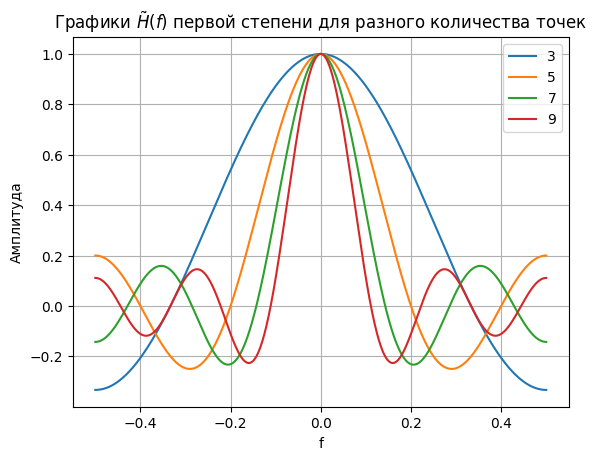

In [103]:
def h(f, points: list[int]):
    return [f(n) for n in points]

def func1(m):
    m //= 2
    return lambda f: np.sin(np.pi * f * (2*m + 1)) / ((2*m + 1) * np.sin(np.pi * f))

points = [3, 5, 7, 9]
start = -0.5
end = 0.5
n = 1000
linestyle = '-'

config = list(zip(h(func1, points), points))
plt.grid()
for (f, label) in config:
  X = np.linspace(start, end, n)
  Y = f(X)
  plt.plot(X, Y, label=label, linestyle=linestyle)
  plt.legend()

plt.xlabel('f')
plt.ylabel('Амплитуда')
plt.title(r'Графики $\tilde H(f)$ первой степени для разного количества точек')
plt.show()

Подведем итог по графикам:

Заметим, что за один полный период каждая из передаточных функций содержит столько локальных экстремумов, сколько точек было задействовано при сглаживании. Таким образом, с увеличением числа точек, используемого для сглаживания, возрастает и количество колебаний передаточной функции. Кроме того, увеличение числа точек приводит к более стремительным изменениям самой передаточной функции.

### Задание 2.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H(f)}$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для решения задачи соответствия между входящим сигналом $s(t)$ и выходным сигналом $y(t)=A+Bt+Ct^2$ по $2m+1$ точкам, нам нужно найти значения параметров $A$, $B$ и $C$, которые минимизируют функцию ошибки $F(A,B,C)$

$F(A, B, C) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m} (s_k - A - Bk - Ck^2)^2$

Чтобы найти оптимальные значения параметров $A$, $B$ и $C$, мы будем брать частные производные функции ошибки по ним и приравнивать их к нулю.

Однако в данном случае мы хотим сгладить результат только для точки $y(0)$ выходного сигнала, основываясь на $m$ входных значениях, поэтому мы используем только y(0)

Вычислим общую формулу сглаживания для данных точек

In [104]:
t, A, B, C = sp.symbols('t,A,B,C')
y = A + B*t + C*t**2

print(*yn(y, (A, B, C), [7, 9, 11, 13]), sep="\n")

2*s_n-1/7 + s_n-2/7 - 2*s_n-3/21 + s_n0/3 + 2*s_n1/7 + s_n2/7 - 2*s_n3/21
18*s_n-1/77 + 13*s_n-2/77 + 2*s_n-3/33 - s_n-4/11 + 59*s_n0/231 + 18*s_n1/77 + 13*s_n2/77 + 2*s_n3/33 - s_n4/11
28*s_n-1/143 + 23*s_n-2/143 + 4*s_n-3/39 + 3*s_n-4/143 - 12*s_n-5/143 + 89*s_n0/429 + 28*s_n1/143 + 23*s_n2/143 + 4*s_n3/39 + 3*s_n4/143 - 12*s_n5/143
24*s_n-1/143 + 21*s_n-2/143 + 16*s_n-3/143 + 9*s_n-4/143 - s_n-6/13 + 25*s_n0/143 + 24*s_n1/143 + 21*s_n2/143 + 16*s_n3/143 + 9*s_n4/143 - s_n6/13


В итоге формулы будут выглядеть так:
1.
   По 7 точкам:
   $$
   \frac{7s_{n+0} + 6s_{n+1} + 3s_{n+2} - 2s_{n+3} + 6s_{n-1} + 3s_{n-2} - 2s_{n-3}}{21}
   $$

2.
   По 9 точкам:
   $$
   \frac{59s_{n+0} + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4} + 54s_{n-1} + 39s_{n-2} + 14s_{n-3} - 21s_{n-4}}{231}
   $$

3.
   По 11 точкам:
   $$
   \frac{89s_{n+0} + 84s_{n+1} + 69s_{n+2} + 44s_{n+3} + 9s_{n+4} - 36s_{n+5} + 84s_{n-1} + 69s_{n-2} + 44s_{n-3} + 9s_{n-4} - 36s_{n-5}}{429}
   $$

4.
   По 13 точкам:
   $$
   \frac{25s_{n+0} + 24s_{n+1} + 21s_{n+2} + 16s_{n+3} + 9s_{n+4} - 11s_{n+5} + 24s_{n-1} + 21s_{n-2} + 16s_{n-3} + 9s_{n-4} - 11s_{n-6}}{143}
   $$

В итоге, используя формулу Эйлера:
$$
$e^{ix} + e^{-ix} = 2 \cos(x)$
$$

Рассчитаем для точек:
- Для 7 точек: $$ \tilde{H}(f) = \frac{1}{21} (7 + 12\cos(2 \pi f ) + 6 \cos(4 \pi f) - 4 \cos(6 \pi f) ) $$

- Для 9 точек: $$ \tilde{H}(f) = \frac{1}{231} (59 + 108\cos(2 \pi f ) + 78 \cos(4 \pi f) + 28 \cos(6 \pi f) - 42 \cos(8 \pi f)) $$

- Для 11 точек: $$ \tilde{H}(f) = \frac{1}{429} (89 + 168\cos(2 \pi f ) + 138 \cos(4 \pi f) + 88 \cos(6 \pi f) + 18 \cos(8 \pi f) - 72 \cos(10 \pi f)) $$

- Для 13 точек: $$ \tilde{H}(f) = \frac{1}{143} (25 + 48\cos(2 \pi f ) + 42 \cos(4 \pi f) + 32 \cos(6 \pi f) + 18 \cos(8 \pi f) + 0 \cos(10 \pi f) - 22 \cos(12 \pi f)) $$

Построим графики:

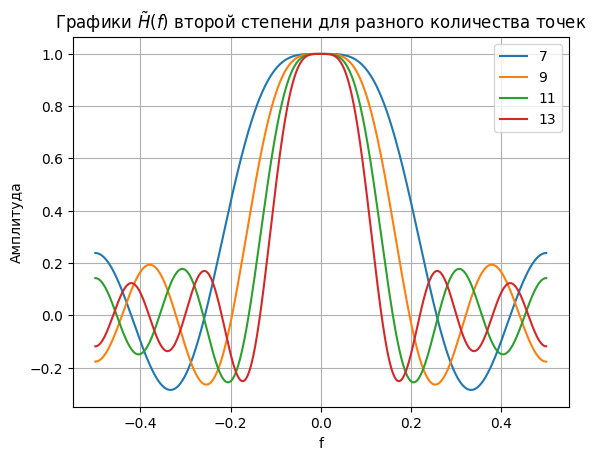

In [105]:
def func2(m):
    m //= 2
    K = (m*(m+1)*(2*m+1)/3-(3*m**2+3*m-1)*(2*m+1)/5)**-1
    D = (3*m**2+3*m-1)/5
    return lambda f: 2 * K * sum([(k**2 - D) * np.cos(2*np.pi*f*k) for k in range(1, m+1)]) - D*K

points = [7, 9, 11, 13]
start = -0.5
end = 0.5
n = 1000
linestyle = '-'

config = list(zip(h(func2, points), points))
plt.grid()
for (f, label) in config:
  X = np.linspace(start, end, n)
  Y = f(X)
  plt.plot(X, Y, label=label, linestyle=linestyle)
  plt.legend()

plt.xlabel('f')
plt.ylabel('Амплитуда')
plt.title(r'Графики $\tilde H(f)$ второй степени для разного количества точек')
plt.show()

Подведем итог по графикам:

Тут также видна такая же тенденция, что и в графиках в первом пункте. Рассмотрим более внимательно каждую точку:

#### 7 точек
Сглаживание по 7 точкам создает максимально широкий купол максимума и характеризуется 4 нулями.

#### 9 точек
При сглаживании по 9 точкам купол максимума становится более узким, а количество нулей увеличивается до 6.

#### 11 точек
Сглаживание с использованием 11 точек приводит к еще более узкому куполу основного максимума, число нулей достигает 8.

#### 13 точек
С применением 13 точек удается получить наиболее узкий купол максимума с 10 нулями.

### Задание 3.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H(f)}$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Пусть $ s(t) $ обозначает входной сигнал, а выходной сигнал представляется в виде $ y(t) = A + Bt + Ct^2 + Dt^3 + Et^4 $

Необходимо подобрать коэффициенты (A, B, C, D, E) так, чтобы выходной сигнал $ y(t) $ максимально соответствовал входному сигналу $ s(t) $ на основе $ 2m+1 $ точек. Для достижения этой цели минимизируем функцию ошибки через метод наименьших квадратов (МНК):

$ F(A, B, C, D, E) = \sum_{k=-m}^{k=m} (s_k - y_k)^2 = \sum_{k=-m}^{k=m} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2 $

Для нахождения оптимальных значений параметров A, B, C, D и E приравниваем каждую из частных производных к нулю для нахождения критических точек:
   - $\frac{\partial F}{\partial A} = 0$
   - $\frac{\partial F}{\partial B} = 0$
   - $\frac{\partial F}{\partial C} = 0$
   - $\frac{\partial F}{\partial D} = 0$
   - $\frac{\partial F}{\partial E} = 0$


Поскольку мы хотим сгладить значение выходного сигнала в точке $ n $ на основе входных $ m $ точек, нас будет интересовать только центральное значение $ y(0) $.

Вычислим общую формулу сглаживания для данных точек

In [106]:
t, A, B, C, D, E = sp.symbols('t,A,B,C,D,E')
y = A + B*t + C*t**2 + D*t**3 + E*t**4

print(*yn(y, (A, B, C, D, E), [9, 11, 13, 15]), sep="\n")

45*s_n-1/143 + 10*s_n-2/143 - 5*s_n-3/39 + 5*s_n-4/143 + 179*s_n0/429 + 45*s_n1/143 + 10*s_n2/143 - 5*s_n3/39 + 5*s_n4/143
40*s_n-1/143 + 20*s_n-2/143 - 10*s_n-3/429 - 15*s_n-4/143 + 6*s_n-5/143 + s_n0/3 + 40*s_n1/143 + 20*s_n2/143 - 10*s_n3/429 - 15*s_n4/143 + 6*s_n5/143
600*s_n-1/2431 + 30*s_n-2/187 + 10*s_n-3/221 - 135*s_n-4/2431 - 18*s_n-5/221 + 10*s_n-6/221 + 677*s_n0/2431 + 600*s_n1/2431 + 30*s_n2/187 + 10*s_n3/221 - 135*s_n4/2431 - 18*s_n5/221 + 10*s_n6/221
10125*s_n-1/46189 + 7500*s_n-2/46189 + 3755*s_n-3/46189 - 15*s_n-4/4199 - 267*s_n-5/4199 - 20*s_n-6/323 + 15*s_n-7/323 + 851*s_n0/3553 + 10125*s_n1/46189 + 7500*s_n2/46189 + 3755*s_n3/46189 - 15*s_n4/4199 - 267*s_n5/4199 - 20*s_n6/323 + 15*s_n7/323


Преобразуем немного:

1. По 9 точкам:
   $$
   \frac{179s_{n+0} + 135s_{n+1} + 30s_{n+2} - 55s_{n+3} + 15s_{n+4} + 135s_{n-1} + 30s_{n-2} - 55s_{n-3} + 15s_{n-4}}{429}
   $$

2. По 11 точкам:
   $$
   \frac{143s_{n+0} + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} + 18s_{n-5} + 120s_{n-1} + 60s_{n-2} - 10s_{n-3} - 45s_{n-4} + 18s_{n-5}}{429}
   $$

3.
   По 13 точкам:
   $$
   \frac{677s_{n+0} + 600s_{n+1} + 390s_{n+2} + 110s_{n+3} - 135s_{n-4} - 198s_{n+5} + 110s_{n-6} + 600s_{n-1} + 390s_{n-2} + 110s_{n-3} - 135s_{n-4} - 198s_{n-5} + 110s_{n-6}}{2431}
   $$

4. По 15 точкам:
   $$
   \frac{11063s_{n+0} + 10125s_{n+1} + 7500s_{n+2} + 3755s_{n+3} - 165s_{n+4} - 2937s_{n+5} - 2860s_{n+6} + 2145s_{n+7} + 10125s_{n-1} + 7500s_{n-2} + 3755s_{n-3} - 165s_{n-4} - 2937s_{n-5}}{46189}
   $$


Тогда

- Для 9 точек: $$ \tilde{H}(f) = \frac{(179 + 270\cos(2 \pi f ) + 60 \cos(4 \pi f) - 110 \cos(6 \pi f) + 30 \cos(8 \pi f))}{429} $$

- Для 11 точек: $$ \tilde{H}(f) = \frac{(143 + 240\cos(2 \pi f ) + 120 \cos(4 \pi f) - 20 \cos(6 \pi f) - 90 \cos(8 \pi f) + 36 \cos(10 \pi f))}{429} $$

- Для 13 точек: $$ \tilde{H}(f) = \frac{ (677 + 1200\cos(2 \pi f ) + 780 \cos(4 \pi f) + 220 \cos(6 \pi f) - 270 \cos(8 \pi f) - 396 \cos(10 \pi f) + 220 \cos(12 \pi f))}{2431} $$

- Для 15 точек: $$ \tilde{H}(f) = \frac{(11063 + 20250\cos(2 \pi f ) + 15000 \cos(4 \pi f) + 7510 \cos(6 \pi f) - 330 \cos(8 \pi f) - 5874 \cos(10 \pi f) - 5720 \cos(12 \pi f) + 4290 \cos(14 \pi f) )}{46189} $$

Построим графики.

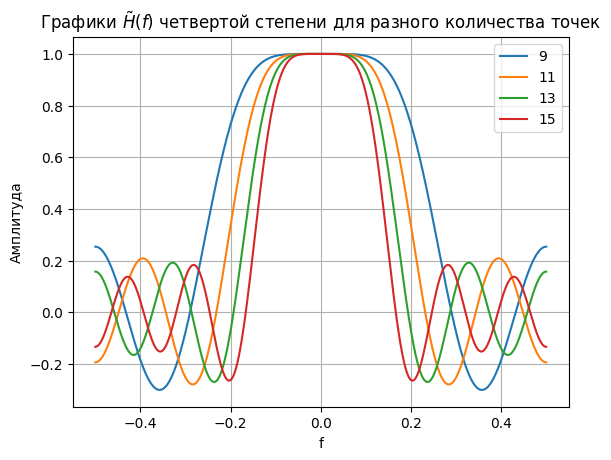

In [107]:
def func3(m):
  m //= 2
  V_1 = (12+5*m*(m+1)*(3*m*(m+1)-10))
  k_2 = 35*(2*m*(m+1)-3)
  V_2 = 4*(2*m-3)*(2*m-1)*(2*m+1)*(2*m+3)*(2*m+5)
  return lambda f: 30 * sum([(V_1 - k_2*k**2 + 63*k**4) * np.cos(2*np.pi*f*k) for k in range(1, m+1)]) / V_2 + 15 * V_1 / V_2

points = [9, 11, 13, 15]
start = -0.5
end = 0.5
n = 1000
linestyle = '-'

config = list(zip(h(func3, points), points))
plt.grid()
for (f, label) in config:
  X = np.linspace(start, end, n)
  Y = f(X)
  plt.plot(X, Y, label=label, linestyle=linestyle)
  plt.legend()

plt.xlabel('f')
plt.ylabel('Амплитуда')
plt.title(r'Графики $\tilde H(f)$ четвертой степени для разного количества точек')
plt.show()

Не считая выводов из прошлых пунктов, здесь можно обратить внимание, что чем более высокий порядок сглаживания мы используем, тем большую часть аргументов в окрестности нуля будут иметь значение функции, близкое к единице.

### Задание 4.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H(f)}$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


Зная формулы Спенсера, которые указаны основных теоретических положения, можем вывести, исходя из прошлых пунктов:

- Для 15 точек: $$ \tilde{H}(f) = \frac{1}{320} (74 + 134\cos(2 \pi f ) + 92 \cos(4 \pi f) + 42 \cos(6 \pi f) + 6 \cos(8 \pi f) - 10 \cos(10 \pi f) - 12 \cos(12 \pi f) - 6 \cos(14 \pi f) ) $$

- Для 21 точки: $$ \tilde{H}(f) = \frac{1}{350} (60 + 114\cos(2 \pi f ) + 94 \cos(4 \pi f) + 66 \cos(6 \pi f) + 36 \cos(8 \pi f) + 12 \cos(10 \pi f) - 4 \cos(12 \pi f) - 10 \cos(14 \pi f) - 10 \cos(16 \pi f) - 6 \cos(18 \pi f) - 2 \cos(20 \pi f) ) $$

Построим графики.

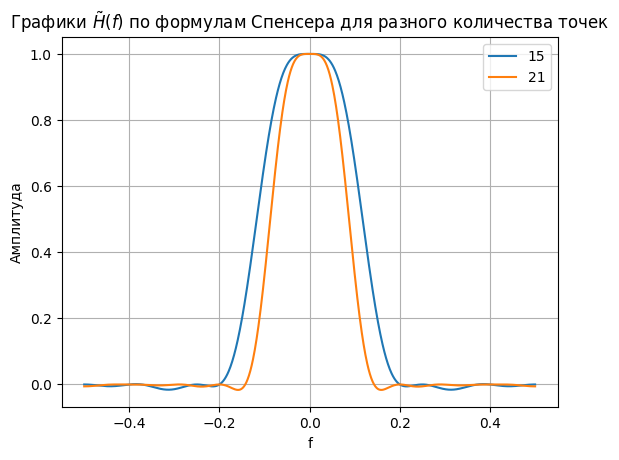

In [108]:
def func4(m):
    if m == 15:
      return lambda x: 1/320 * (74 + 134*np.cos(2*np.pi*x) + 92*np.cos(4*np.pi*x) + 42*np.cos(6*np.pi*x) + 6*np.cos(8*np.pi*x) - 10*np.cos(10*np.pi*x) - 12*np.cos(12*np.pi*x) - 6*np.cos(14*np.pi*x))
    if m == 21:
      return lambda x: 1/350 * (60 + 114*np.cos(2*np.pi*x) + 94*np.cos(4*np.pi*x) + 66*np.cos(6*np.pi*x) + 36*np.cos(8*np.pi*x) + 12*np.cos(10*np.pi*x) - 4*np.cos(12*np.pi*x) - 10*np.cos(14*np.pi*x) - 10*np.cos(16*np.pi*x) - 6*np.cos(18*np.pi*x) - 2*np.cos(20*np.pi*x))
    return 0

points = [15, 21]
start = -0.5
end = 0.5
n = 1000
linestyle = '-'

config = list(zip(h(func4, points), points))
plt.grid()
for (f, label) in config:
  X = np.linspace(start, end, n)
  Y = f(X)
  plt.plot(X, Y, label=label, linestyle=linestyle)
  plt.legend()

plt.xlabel('f')
plt.ylabel('Амплитуда')
plt.title(r'Графики $\tilde H(f)$ по формулам Спенсера для разного количества точек')
plt.show()

По графикам можно заметить, что данные передаточные функции демонстрируют маленькие колебания по амплитуде вдали от точки нуля.

### Задание 5.

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

Построим графики.

In [109]:
def to_decibel(f, ns):
  logify = lambda func: lambda k: 20 * np.log(abs(func(k)))
  return [logify(func) for func in h(f, ns)]

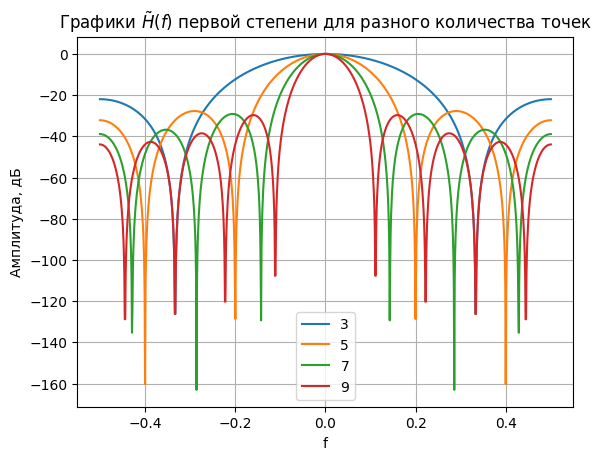

In [110]:
points1 = [3, 5, 7, 9]
start = -0.5
end = 0.5
n = 1000
linestyle = '-'

config = list(zip(to_decibel(func1, points1), points1))
plt.grid()
for (f, label) in config:
  X = np.linspace(start, end, n)
  Y = f(X)
  plt.plot(X, Y, label=label, linestyle=linestyle)
  plt.legend()

plt.xlabel('f')
plt.ylabel('Амплитуда, дБ')
plt.title(r'Графики $\tilde H(f)$ первой степени для разного количества точек')
plt.show()

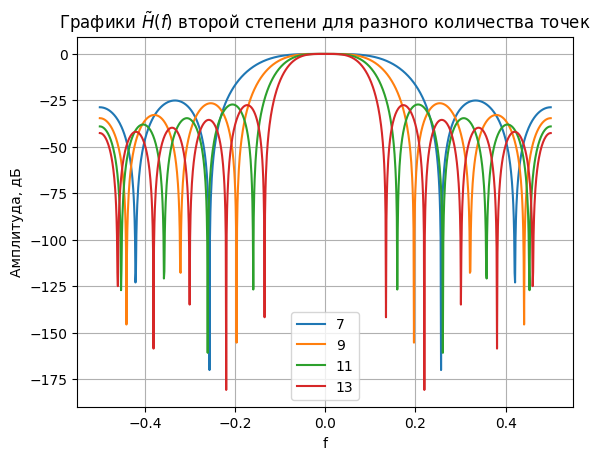

In [111]:
points2 = [7, 9, 11, 13]
start = -0.5
end = 0.5
n = 1000
linestyle = '-'

config = list(zip(to_decibel(func2, points2), points2))
plt.grid()
for (f, label) in config:
  X = np.linspace(start, end, n)
  Y = f(X)
  plt.plot(X, Y, label=label, linestyle=linestyle)
  plt.legend()

plt.xlabel('f')
plt.ylabel('Амплитуда, дБ')
plt.title(r'Графики $\tilde H(f)$ второй степени для разного количества точек')
plt.show()

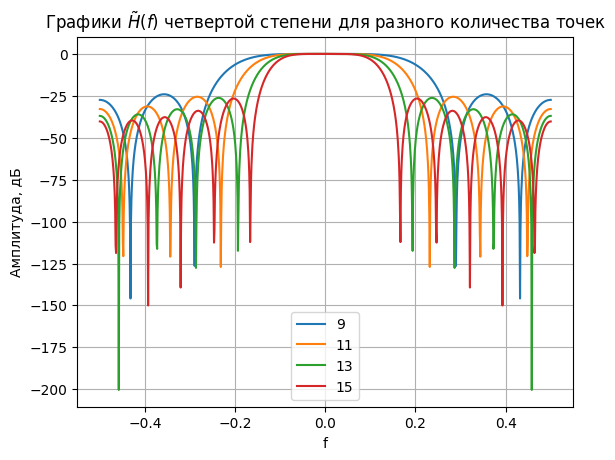

In [112]:
points3 = [9, 11, 13, 15]
start = -0.5
end = 0.5
n = 1000
linestyle = '-'

config = list(zip(to_decibel(func3, points3), points3))
plt.grid()
for (f, label) in config:
  X = np.linspace(start, end, n)
  Y = f(X)
  plt.plot(X, Y, label=label, linestyle=linestyle)
  plt.legend()

plt.xlabel('f')
plt.ylabel('Амплитуда, дБ')
plt.title(r'Графики $\tilde H(f)$ четвертой степени для разного количества точек')
plt.show()

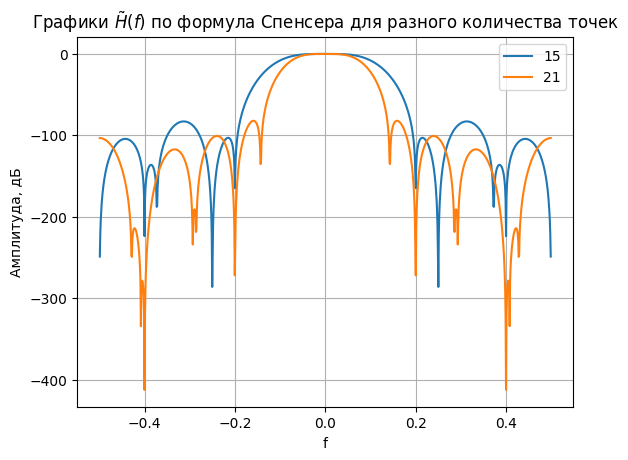

In [113]:
points4 = [15, 21]
start = -0.499
end = 0.499
n = 1000
linestyle = '-'

config = list(zip(to_decibel(func4, points4), points4))
plt.grid()
for (f, label) in config:
  X = np.linspace(start, end, n)
  Y = f(X)
  plt.plot(X, Y, label=label, linestyle=linestyle)
  plt.legend()

plt.xlabel('f')
plt.ylabel('Амплитуда, дБ')
plt.title(r'Графики $\tilde H(f)$ по формула Спенсера для разного количества точек')
plt.show()

Эти графики были получены путем логарифмирования передаточных функций. Эта процедура позволяет лучше различать значения на высоких частотах, которые могут быть слишком малы для обычного отображения. Также на этих графиках более четко видно, какие частоты испытывают наибольшее подавление, что проявляется в резких падениях вниз.

### Задание 6.

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Были построены графики передаточных функций нерекурсивных фильтров, соответствующих сглаживанию с использованием прямой линии, полиномов второй и четвертой степени, а также по формулам Спенсера. Графики демонстрируют следующее:

1. Увеличение количества точек приводит к более быстрому изменению значений функций и уменьшению амплитуды последующих колебаний.

2. Повышение порядка полинома расширяет диапазон значений, в котором функция остается близкой к единице.

3. Сглаживание с использованием формул Спенсера характеризуется тем, что после резкого падения до нуля наблюдаются низкоамплитудные осцилляции.

## Выводы

В ходе лабораторной работы были исследованы различные аспекты создания передаточных функций для нерекурсивных фильтров, осуществляющих сглаживание. Рассматривались фильтры, использующие прямую линию и полиномы второй и четвертой степени, а также фильтр по формуле Спенсера. Для каждого из фильтров были построены графики в линейном и логарифмическом масштабах, что позволило более детально анализировать амплитуды на различных частотах, особенно в области высоких частот. Наблюдения показали, что увеличение количества точек приводит к уменьшению ширины купола главного максимума, а повышение степени полинома сглаживания вызывает его увеличение при одновременном усилении затухания. Фильтр по формуле Спенсера продемонстрировал наиболее быстрое затухание и минимальные колебания, что подчеркивает его эффективность в контексте сглаживания сигналов.